In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/real_estate.csv')
df

<ipython-input-2-2bb8bb84d6cf>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/real_estate.csv')


,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN
2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN
3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN
4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,NaN,-73.191290,41.543605
1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [ ]:
# this deleted exactly 8,705 duplicate entries!!!!! ;) <3 xoxoxoxoxxo
df = df.drop_duplicates()
df

,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN
2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN
3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN
4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,NaN,-73.191290,41.543605
1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_date = LabelEncoder()
le_town = LabelEncoder()
le_address = LabelEncoder()
le_property = LabelEncoder()
le_residential = LabelEncoder()

In [ ]:
# label encode categorical values into numerical using one-hot encoding
df['date_n'] = le_date.fit_transform(df['Date Recorded'])
df['town_n'] = le_town.fit_transform(df['Town'])
df['address_n'] = le_address.fit_transform(df['Address'])
df['property_n'] = le_property.fit_transform(df['Property Type'])
df['residential_n'] = le_residential.fit_transform(df['Residential Type'])
df.tail(200)

<ipython-input-5-43cf40c1c988>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_n'] = le_date.fit_transform(df['Date Recorded'])
<ipython-input-5-43cf40c1c988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['town_n'] = le_town.fit_transform(df['Town'])
<ipython-input-5-43cf40c1c988>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude,date_n,town_n,address_n,property_n,residential_n
1053959,2022-09-28,2021,Woodbury,305 MAIN ST SOUTH,110020.0,595000.0,0.184908,Residential,Single Family,-73.207834,41.540599,6670,168,368231,6,2
1053960,2022-04-27,2021,Waterford,19 BRILL AVENUE,125400.0,310000.0,0.404500,Residential,Single Family,-72.142326,41.349377,6545,152,209509,6,2
1053961,2022-09-23,2021,West Hartford,26 ARNOLD WAY GAR 11A,4340.0,45000.0,0.096400,Residential,Condo,-72.736808,41.764557,6665,154,311306,6,0
1053962,2022-08-01,2021,Wethersfield,65 LINDEN ST,135190.0,50000.0,2.703800,Residential,Single Family,-72.671985,41.701393,6624,159,602304,6,2
1053963,2022-04-27,2021,West Hartford,25 STONEHAM DRIVE,248168.0,435000.0,0.570500,Residential,Single Family,-72.734052,41.791654,6545,154,304546,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.611800,Residential,Single Family,-73.114797,41.586333,6423,153,525224,6,2
1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.399000,Residential,Condo,-73.232742,41.517140,6662,168,697803,6,0
1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.221000,Vacant Land,NaN,-73.191290,41.543605,6553,168,615594,10,5
1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.427600,Residential,Single Family,-72.976177,41.281588,6597,155,59978,6,2


In [ ]:
# check for missing values
print(df.isna().any())

Date Recorded        True
List Year           False
Town                False
Address              True
Assessed Value      False
Sale Amount         False
Sales Ratio         False
Property Type        True
Residential Type     True
Longitude            True
Latitude             True
date_n              False
town_n              False
address_n           False
property_n          False
residential_n       False
dtype: bool


In [ ]:
# fill in Longitude and Latitude with mean for missing values
### Check with TA to see if we can find same town and plug in their info to missing
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)

<ipython-input-7-622aae6d7206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
<ipython-input-7-622aae6d7206>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)


In [ ]:
# recheck for missing values
print(df['Latitude'].isna().any())
print(df['Longitude'].isna().any())

False
False


In [ ]:
x=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
y=df['Sale Amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

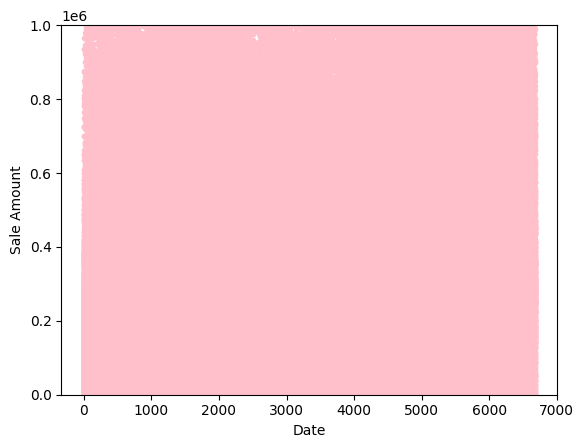

In [ ]:
# Date & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.date_n,y,color='pink',marker='.')
plt.xlabel('Date')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

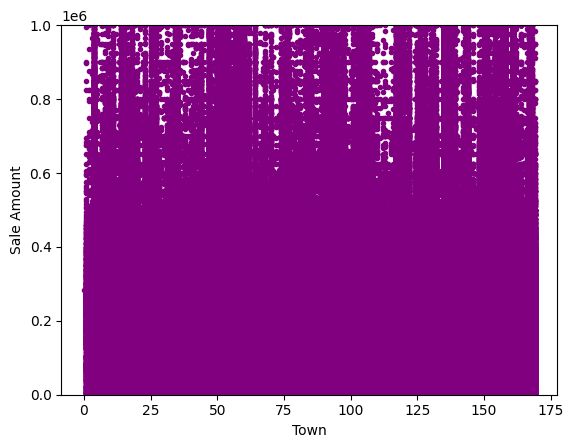

In [ ]:
# Town & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.town_n,y,color='purple',marker='.')
plt.xlabel('Town')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

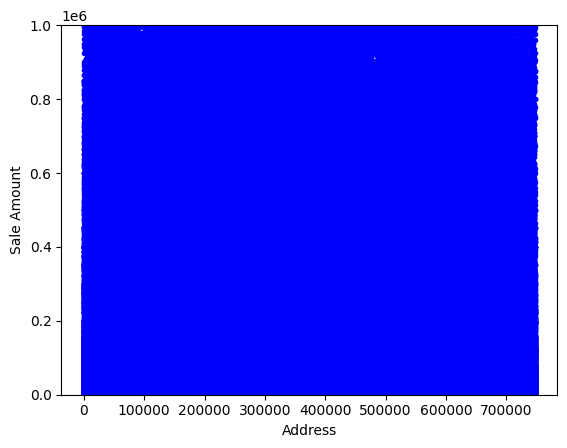

In [ ]:
# Address & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.address_n,y,color='blue',marker='.')
plt.xlabel('Address')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

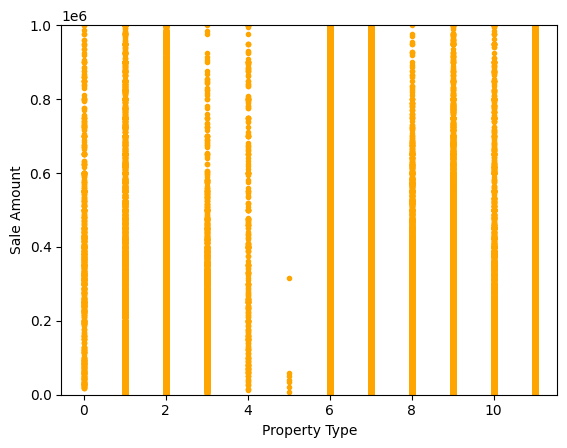

In [ ]:
# Property Type & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.property_n,y,color='orange',marker='.')
plt.xlabel('Property Type')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

In [ ]:
mapping = dict(zip(le_property.classes_, range(len(le_property.classes_))))
print(mapping)
# public utility is 5, seems to make value of property cheap

{'Apartments': 0, 'Commercial': 1, 'Condo': 2, 'Four Family': 3, 'Industrial': 4, 'Public Utility': 5, 'Residential': 6, 'Single Family': 7, 'Three Family': 8, 'Two Family': 9, 'Vacant Land': 10, nan: 11}


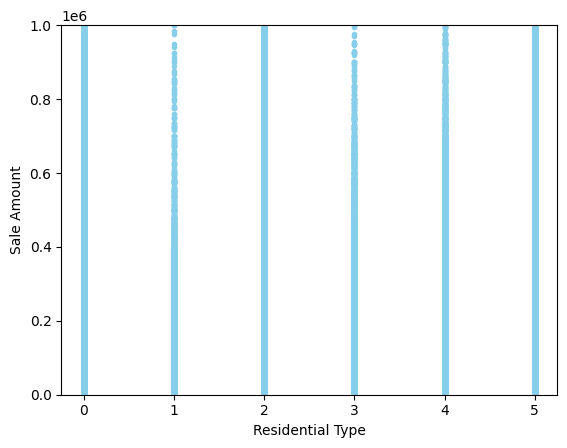

In [ ]:
# Residential Type & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.residential_n,y,color='skyblue',marker='.')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

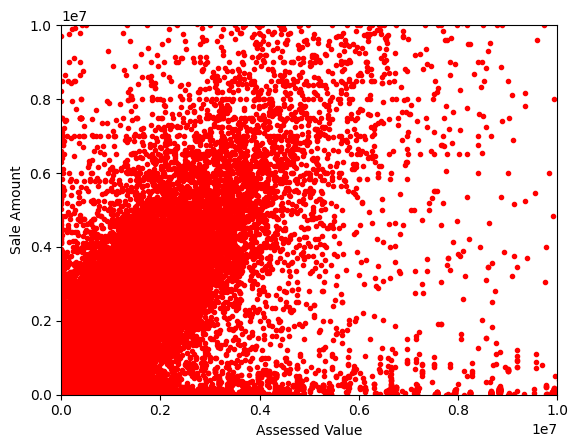

In [ ]:
# Assessed Value & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Assessed Value'],y,color='red',marker='.')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.xlim(0, 10000000)
plt.ylim(0, 10000000)
plt.show()

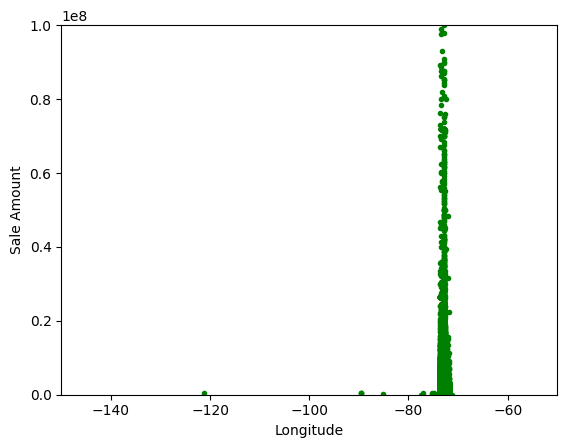

In [ ]:
# Longitude & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Longitude'],y,color='green',marker='.')
plt.xlabel('Longitude')
plt.ylabel('Sale Amount')
plt.xlim(-150, -50)
plt.ylim(0, 100000000)
plt.show()

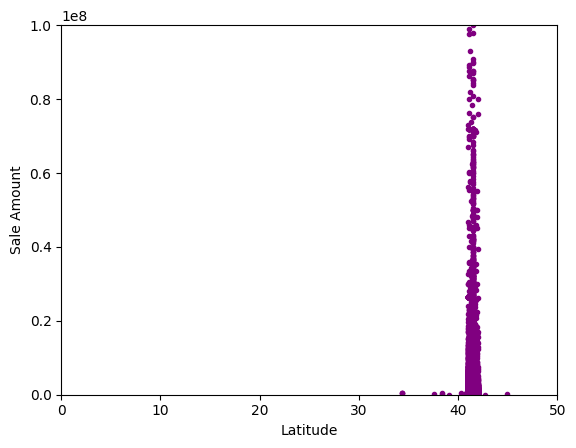

In [ ]:
# Latitude & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Latitude'],y,color='purple',marker='.')
plt.xlabel('Latitude')
plt.ylabel('Sale Amount')
plt.xlim(0, 50)
plt.ylim(0, 100000000)
plt.show()

In [ ]:
# MixMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['List Year'] = scaler.fit_transform(df[['List Year']])
df['Assessed Value'] = scaler.fit_transform(df[['Assessed Value']])
df['Longitude'] = scaler.fit_transform(df[['Longitude']])
df['Latitude'] = scaler.fit_transform(df[['Latitude']])
df['date_n'] = scaler.fit_transform(df[['date_n']])
df['town_n'] = scaler.fit_transform(df[['town_n']])
df['address_n'] = scaler.fit_transform(df[['address_n']])
df['property_n'] = scaler.fit_transform(df[['property_n']])
df['residential_n'] = scaler.fit_transform(df[['residential_n']])
print("Min:", df['List Year'].min())
print("Max:", df['Assessed Value'].max())
print("Min:", df['Longitude'].min())
print("Max:", df['Latitude'].max())
print("Min:", df['date_n'].min())
print("Max:", df['town_n'].max())
print("Max:", df['address_n'].max())
print("Max:", df['property_n'].max())
print("Max:", df['residential_n'].max())
print(df)

<ipython-input-19-e3464eb901e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['List Year'] = scaler.fit_transform(df[['List Year']])
<ipython-input-19-e3464eb901e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Assessed Value'] = scaler.fit_transform(df[['Assessed Value']])
<ipython-input-19-e3464eb901e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Min: 0.0
Max: 1.0
Min: 0.0
Max: 0.9999999999999996
Min: 0.0
Max: 1.0
Max: 1.0
Max: 1.0
Max: 1.0
        Date Recorded  List Year        Town                    Address  \
0          2021-04-14       0.95     Ansonia              323 BEAVER ST   
1          2021-05-26       0.95     Ansonia             152 JACKSON ST   
2          2021-09-13       0.95     Ansonia            230 WAKELEE AVE   
3          2020-12-14       0.95     Ansonia                57 PLATT ST   
4          2021-09-07       0.95        Avon               245 NEW ROAD   
...               ...        ...         ...                        ...   
1054154    2021-11-16       1.00   Watertown            50 SUMMIT RIDGE   
1054155    2022-09-20       1.00    Woodbury  89 TAMARACK LANR UNIT 89A   
1054156    2022-05-06       1.00    Woodbury         69 BACON POND ROAD   
1054157    2022-06-29       1.00  West Haven             114 TUTHILL ST   
1054158    2022-04-26       1.00     Windsor         200 BLOOMFIELD AVE   

   

In [ ]:
mymodel=LinearRegression()
mymodel.fit(x,y)

LinearRegression()

In [ ]:
mymodel.intercept_

97010116.97974667

In [ ]:
# x=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
mymodel.coef_

array([-4.73765279e+04,  3.79310482e-01, -1.85205928e+05, -3.73095114e+05,
        1.94634834e+02,  5.48744697e+02, -3.29135724e-02, -9.06280369e+04,
        1.86629779e+05])

In [ ]:
# pred_sales_amount = -4.73765279e+04('List Year') + 3.79310482e-01('Assessed Value') + -1.85205928e+05('Longitude') + -3.73095114e+05('Latitude')
# + 1.94634834e+02('date_n') + 5.48744697e+02('town_n') + -3.29135724e-02('address_n') + -9.06280369e+04('property_n') + 1.86629779e+05('residential_n')
# + 97010116.97974667

In [ ]:
y_pred_lin=mymodel.predict(x_test)
print(y_pred_lin)

[359419.40629245 505174.38814472 369169.98918733 ... 377494.20164773
 287972.51935191 330533.82370558]


Mean Absolute Error (MAE): 279319.25530593714
Mean Squared Error (MSE): 4982191624878.448
R-squared: 0.11645654754593882


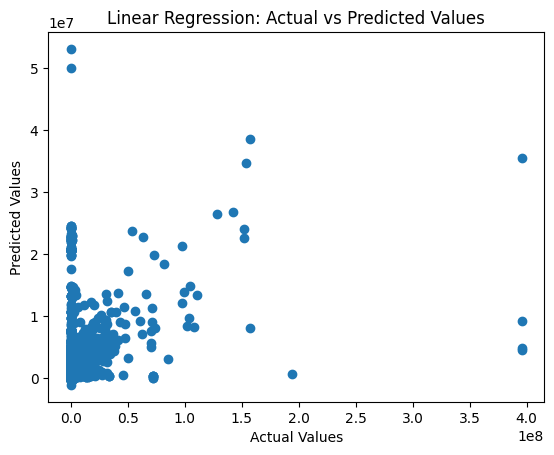

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lin)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lin)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_lin)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# plot
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
mymodel_ridge=Ridge()
mymodel_ridge.fit(x,y)

Ridge()

In [ ]:
y_pred_rid=mymodel.predict(x_test)
print(y_pred_rid)

[359419.40629245 505174.38814472 369169.98918733 ... 377494.20164773
 287972.51935191 330533.82370558]


Mean Squared Error: 4982191624878.448
Mean Absolute Error (MAE): 279319.25530593714
R-squared: 0.11645654754593882


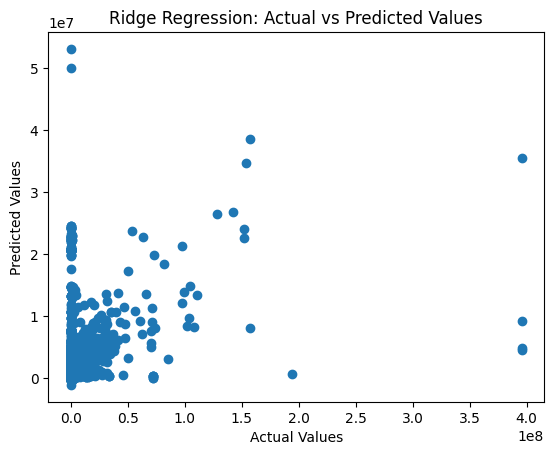

In [ ]:
from sklearn.linear_model import Ridge

# make ridge regression model
ridge_regression = Ridge(alpha=1.0)

# Fit model to training data
ridge_regression.fit(x_train, y_train)

# predict test data
y_prediction = ridge_regression.predict(x_test)

# evaluate
mse = mean_squared_error(y_test, y_pred_rid)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rid)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_rid)
print("R-squared:", r_squared)

# plot actual vs prediction val
plt.scatter(y_test, y_pred_rid)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
mymodel_lasso=Lasso()
mymodel_lasso.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+19, tolerance: 2.883e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
y_pred_las=mymodel.predict(x_test)
print(y_pred_las)

[359419.40629245 505174.38814472 369169.98918733 ... 377494.20164773
 287972.51935191 330533.82370558]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+19, tolerance: 2.765e+15
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 4982191624878.448
Mean Absolute Error (MAE): 279319.25530593714
R-squared: 0.11645654754593882


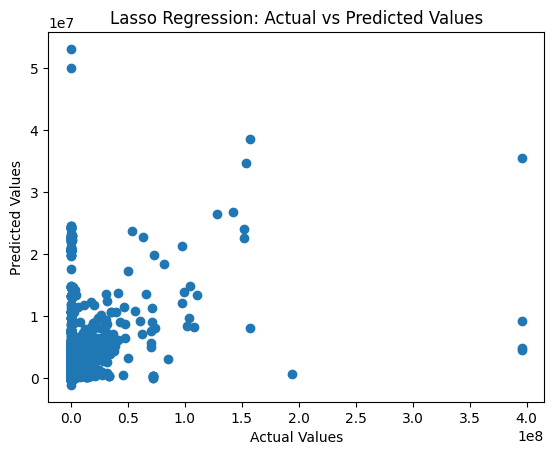

In [ ]:
from sklearn.linear_model import Lasso

# make Lasso regression
lasso = Lasso(alpha=1.0)

# Fit model to training data
lasso.fit(x_train, y_train)

# Predict on test data
y_prediction = lasso.predict(x_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred_las)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_las)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_las)
print("R-squared:", r_squared)

# Plot predictions vs actual val
plt.scatter(y_test, y_pred_las)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.show()

In [ ]:
df_log = df
df_log['Affordable'] = df_log['Sale Amount'].apply(lambda x: 1 if x > 350000 else 0)
df_log

<ipython-input-32-f794d302c659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['Affordable'] = df_log['Sale Amount'].apply(lambda x: 1 if x > 350000 else 0)


,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude,date_n,town_n,address_n,property_n,residential_n,Affordable
0,2021-04-14,0.95,Ansonia,323 BEAVER ST,0.000151,248400.0,0.5354,Residential,Single Family,0.962419,0.661486,0.936311,0.011834,0.516049,0.545455,0.4,0
1,2021-05-26,0.95,Ansonia,152 JACKSON ST,0.000125,239900.0,0.4606,Residential,Three Family,0.966212,0.675595,0.941705,0.011834,0.199834,0.545455,0.6,0
2,2021-09-13,0.95,Ansonia,230 WAKELEE AVE,0.000171,325000.0,0.4630,Commercial,NaN,0.966212,0.675595,0.955043,0.011834,0.374410,0.090909,1.0,0
3,2020-12-14,0.95,Ansonia,57 PLATT ST,0.000145,202500.0,0.6291,Residential,Two Family,0.966212,0.675595,0.921325,0.011834,0.749935,0.545455,0.8,0
4,2021-09-07,0.95,Avon,245 NEW ROAD,0.000247,400000.0,0.5441,Residential,Single Family,0.966212,0.675595,0.954443,0.023669,0.395806,0.545455,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054154,2021-11-16,1.00,Watertown,50 SUMMIT RIDGE,0.000298,430000.0,0.6118,Residential,Single Family,0.961488,0.683792,0.962536,0.905325,0.702888,0.545455,0.4,1
1054155,2022-09-20,1.00,Woodbury,89 TAMARACK LANR UNIT 89A,0.000091,200000.0,0.3990,Residential,Condo,0.959132,0.677257,0.998352,0.994083,0.933844,0.545455,0.0,0
1054156,2022-05-06,1.00,Woodbury,69 BACON POND ROAD,0.000090,360000.0,0.2210,Vacant Land,NaN,0.959960,0.679757,0.982017,0.994083,0.823827,0.909091,1.0,1
1054157,2022-06-29,1.00,West Haven,114 TUTHILL ST,0.000133,275000.0,0.4276,Residential,Single Family,0.964258,0.655012,0.988611,0.917160,0.080266,0.545455,0.4,0


In [ ]:
xlog=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
ylog=df['Affordable']

xlog_train,xlog_test,ylog_train,ylog_test=train_test_split(xlog,ylog,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
mymodellog = LogisticRegression()

In [ ]:
mymodellog.fit(xlog_train,ylog_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_log = mymodellog.predict(xlog_test)

In [ ]:
mymodellog.predict_proba(xlog_test)

array([[0.82669792, 0.17330208],
       [0.62401814, 0.37598186],
       [0.63663577, 0.36336423],
       ...,
       [0.65741721, 0.34258279],
       [0.78627308, 0.21372692],
       [0.71636816, 0.28363184]])

In [ ]:
# Check accuracy of model
mymodellog.score(xlog_test,ylog_test)

0.7431453290672483

In [ ]:
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
mymodellog.coef_

array([[ -5.46421016,  46.77082437, -40.11941072, -21.66186813,
          6.67145763,   0.2347373 ,  -0.14475663,   0.21430059,
          0.30976647]])

In [ ]:
mymodellog.intercept_

array([51.24875266])

In [ ]:
# Model Evaluation - From Lecture
y_pred_log = mymodellog.predict(xlog_test)
accuracy = accuracy_score(ylog_test, y_pred_log)
precision = precision_score(ylog_test, y_pred_log)
recall = recall_score(ylog_test, y_pred_log)
f1 = f1_score(ylog_test, y_pred_log)
roc_auc = roc_auc_score(ylog_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.7431453290672483
Precision: 0.7379466817923993
Recall: 0.09119904665101118
F1 Score: 0.16233583928627135
ROC AUC: 0.5395217355350181


In [ ]:
from sklearn.svm import SVC
mymodel_svc=SVC(kernel='linear', C=1.0, probability=True)

In [ ]:
# mymodel_svc.fit(xlog_train,ylog_train)

In [ ]:
# y_prediction_svc = mymodel_svc.predict(xlog_test)

In [ ]:
# mymodel_svc.score(xlog_test,ylog_test)

In [ ]:
# y_prediction_svc

In [ ]:
# mymodel_svc.coef_

In [ ]:
# mymodel_svc.intercept_

In [ ]:
# from sklearn.model_selection import cross_val_score

# mymodel_svc2 = SVC()

# # Cross Validation
# cv_scores = cross_val_score(mymodel_svc2, x, df.left, cv=5)

# # Cross Validation Score
# print("Cross-Validation Score:", cv_scores)

# # Show Mean Cross Validation Score
# print("Mean Cross-Validation Score:", cv_scores.mean())

In [ ]:
# # Plotting the cross-validation scores
# plt.figure(figsize=(10, 6))

# # Bar plot
# plt.bar(range(1, len(cv_scores) + 1), cv_scores, tick_label=[f'Fold {i}' for i in range(1, len(cv_scores) + 1)])
# plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean Score: {cv_scores.mean():.2f}')

# plt.xlabel('Fold')
# plt.ylabel('Cross-Validation Score')
# plt.title('Cross-Validation Scores per Fold')
# plt.legend()
# plt.show()